<a href="https://colab.research.google.com/github/fernando45y2/ProyectoFinal/blob/main/Analisis_Proyecto_final_Jhoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd

In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/it-ces/Rules-puj/main/products.csv")

#Se crea un campo nuevo y al campo product_name se le realiza un replace
products['product_name'] = products['product_name'].replace(to_replace="[^a-z\dA-Z \s+ ]", value="~", regex=True)
#verificamos que este limpio el campos product_name de acuerdo a el replace que hicimos anteriormente
products['product_name']

#llamamos la base de datos order_products_train
order_products_train = pd.read_csv("https://raw.githubusercontent.com/it-ces/Rules-puj/main/order_products__train.csv")

#en la varible full se guarda la relacion de las dos tablas
full = order_products_train.merge(products, on='product_id',how='outer', indicator=True)
full

# se restablecer el índice del campo _merge cuando sea igaul a  both
full =full[full['_merge']=='both'].reset_index(drop=True)

#organiza el campo order_id en orden ascendente
full =full.sort_values('order_id')
full
#consulta un registro sobre la tabla full solo obteniendo el la factura 1.0
order1 = full[full['order_id'] == 1.0]
order1

#Se crea un varibale transactions donde nos trae el numero de factura y los productos asociados a cada factura
transactions ={}
for iden in full['order_id'].unique():
    transactions[iden]=[]
for index in full.index:
    transactions[full.loc[index,'order_id']].append(full.loc[index,'product_name'])

data = []
for t in transactions:
    data.append(transactions[t])


#Genera un informe de la data trasformada en un archivo delimitado por coma csv
with open('TransactionsInstacart.csv','w') as f:
    for transaction in data:
        for item in transaction:
            f.write(str(item) + ',')
        f.write('\n')



In [ ]:
# Cargar la extensión rpy2.ipython en IPython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Instalar el paquete "arules" en R para análisis de reglas de asociación
%%R
install.packages("arules")

(as ‘lib’ is unspecified)







	‘/tmp/RtmplLpgOz/downloaded_packages’



In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Cargar la librería "arules" en R para análisis de reglas de asociación
%%R
library("arules")

In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Leer transacciones desde el archivo CSV 'TransactionsInstacart.csv'
# y almacenarlas en el objeto "baskets" utilizando la función read.transactions()
%%R
baskets <- read.transactions('TransactionsInstacart.csv', sep=',')

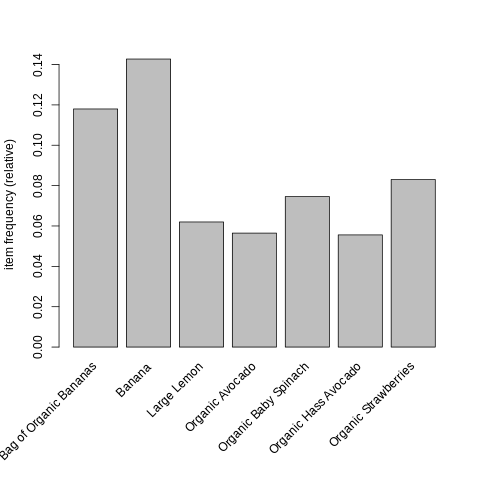

In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Generar un gráfico de frecuencia de elementos utilizando la función itemFrequencyPlot()
# del paquete "arules" con un umbral de soporte (support) de 0.055
# (esto se refiere al mínimo soporte para mostrar los elementos)
%%R
itemFrequencyPlot(baskets,support=0.055)  #minsuport
# we can uses topN=# to see the more

In [ ]:
# Crear un DataFrame en pandas llamado "counter"
# que almacena la longitud de cada elemento en la lista "data"
# La longitud de cada transacción se refiere a la cantidad de elementos en esa transacción
counter = pd.DataFrame([len(T) for T in data], columns=['k-itemset'])

In [ ]:
# Crear un nuevo DataFrame en pandas llamado "to_testing"
# a partir de los conteos y la clasificación de las longitudes de elementos
# almacenados en el DataFrame "counter"
to_testing = pd.DataFrame(counter['k-itemset'].value_counts().sort_index())

In [ ]:
# Calcular la suma total de los valores en la columna 'k-itemset' del DataFrame "to_testing"
to_testing['k-itemset'].sum()

131209

In [ ]:
# Calcular la suma acumulativa de los valores en la columna 'k-itemset' del DataFrame "to_testing"
# y guardar los resultados en un archivo Excel llamado 'cumulativedistribution.xlsx'
to_testing[['k-itemset']].cumsum().to_excel('cumulativedistribution.xlsx')

In [ ]:
# Contar los valores únicos en la columna 'k-itemset' del DataFrame "to_testing"
# y mostrar la frecuencia de cada valor
to_testing['k-itemset'].value_counts()

2      6
1      3
3      3
4      3
5      2
      ..
860    1
679    1
634    1
553    1
403    1
Name: k-itemset, Length: 63, dtype: int64

<Axes: >

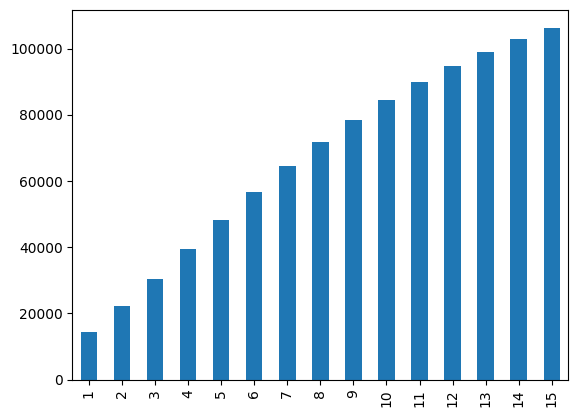

In [ ]:
# Leer los datos del archivo Excel 'cumulativedistribution.xlsx' y almacenarlos en el DataFrame "cumsum"
cumsum = pd.read_excel('cumulativedistribution.xlsx')

# Crear un gráfico de barras utilizando los datos de la columna 'k-itemset' del DataFrame "cumsum"
# para las filas del índice 1 al 15 (inclusive)
cumsum[1:16]['k-itemset'].plot(kind='bar')

<Axes: >

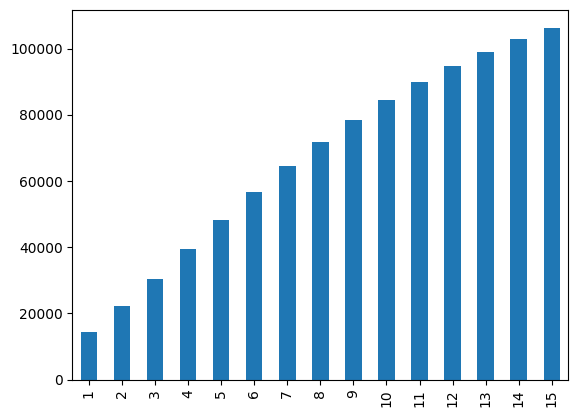

In [ ]:
# Crear un gráfico de barras utilizando los datos de la columna 'k-itemset' del DataFrame "cumsum"
# para las filas del índice 1 al 15 (inclusive)
cumsum[1:16]['k-itemset'].plot(kind='bar')

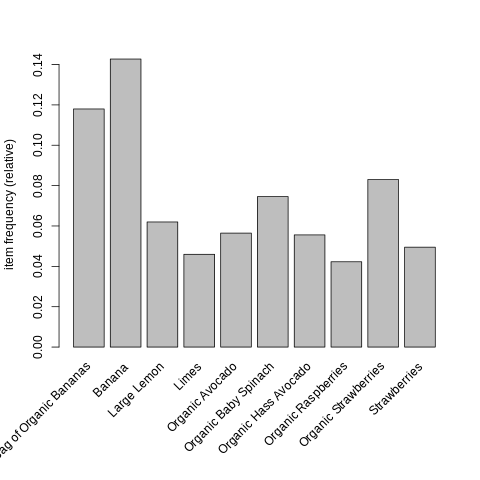

In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Generar un gráfico de frecuencia de elementos utilizando la función itemFrequencyPlot()
# del paquete "arules" con un umbral de soporte (support) de 0.02 (minsupport)
# Muestra la frecuencia de los productos en las transacciones, la variable basket se refiere al objeto que contiene las transacciones
%%R
itemFrequencyPlot(baskets, support=0.04)  # support mínimo (minsupport)

In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Aplicar el algoritmo Apriori a las transacciones almacenadas en el objeto "baskets"
# Establecer los parámetros de soporte, confianza, longitud mínima y longitud máxima de las reglas
# Los resultados se almacenan en el objeto "Rules"
%%R
Rules <- apriori(baskets, parameter=list(support=0.001, confidence=0.3, minlen=2, maxlen=15))

# Ordenar las reglas resultantes por la medida "lift"
# Los resultados se almacenan en el objeto "rulesordered"
rulesordered <- sort(Rules, by = "lift")

# Inspeccionar y mostrar las reglas ordenadas en orden ascendente
inspect(rulesordered)

In [ ]:
# Ejecutar código R en la celda utilizando la celda mágica %%R
# Escribir las reglas de asociación obtenidas del algoritmo Apriori en un archivo CSV
# El archivo se llama "rulesdatabase.csv"
# Se establecen los parámetros de separador (sep), uso de comillas (quote),
# y no incluir los nombres de las filas (row.names) en el archivo
%%R
write(Rules,
      file = "rulesdatabase.csv",
      sep = ",",
      quote = TRUE,
      row.names = FALSE)

In [ ]:
# Leer los datos del archivo CSV "rulesdatabase.csv" utilizando pandas
# Almacenar los datos en un DataFrame llamado "pyrules"
pyrules = pd.read_csv("rulesdatabase.csv", sep=',')


In [ ]:
# Ordenar las filas del DataFrame "pyrules" en función de la columna 'lift'
# en orden descendente y aplicar el cambio directamente al DataFrame (inplace=True)
pyrules.sort_values(by=['lift'], ascending=False, inplace=True)


In [ ]:
# Restablecer los índices de las filas del DataFrame "pyrules"
# después de ordenarlas y aplicar el cambio directamente al DataFrame (inplace=True)
pyrules.reset_index(inplace=True)

In [ ]:
# Exportar los datos del DataFrame "pyrules" a un archivo de Excel llamado "rules.xlsx"
pyrules.to_excel("rules.xlsx")

In [ ]:
# Obtener la longitud (cantidad de elementos) de la lista "data"
len(data)


131209

In [ ]:
# Referencia al objeto "pyrules", que podría ser un DataFrame que contiene las reglas de asociación
pyrules


In [ ]:
# Ejecuta toda la base de datos con los resultados transformados
data

In [ ]:
# Referencia al objeto "order_products_train", que podría ser un DataFrame que contiene información sobre los productos y pedidos
order_products_train


In [ ]:
# Se inicializa un diccionario vacío para almacenar las transacciones (órdenes) y los productos asociados.
transactions = {}

# Se itera a través de los valores únicos de la columna 'order_id' en el DataFrame order_products_train.
# Se crea una entrada en el diccionario transactions para cada order_id, con una lista vacía como valor inicial.
for iden in order_products_train['order_id'].unique():
    transactions[iden] = []

# Se itera a través de los índices del DataFrame order_products_train.
# Para cada índice, se obtiene el 'order_id' y 'product_id' asociados a ese índice.
# Luego, se agrega el 'product_id' a la lista correspondiente en el diccionario transactions.
for index in order_products_train.index:
    transactions[order_products_train.loc[index, 'order_id']].append(order_products_train.loc[index, 'product_id'])

# Se crea una lista vacía llamada data para almacenar las listas de productos por transacción.
data = []

# Se itera a través de las claves del diccionario transactions (que son los 'order_id').
# Para cada order_id, se agrega la lista de productos asociados a esa orden al final de la lista data.
for t in transactions:
    data.append(transactions[t])


In [ ]:
data

In [ ]:
# Se abre un archivo llamado 'Twithproduct.csv' en modo de escritura ('w').
# El archivo se abrirá o creará en caso de no existir. Se utilizará para almacenar datos procesados.

with open('Twithproduct.csv', 'w') as f:
    # Se itera a través de cada transacción en la lista de datos.
    for transaction in data:
        # Se itera a través de cada elemento (producto) en la transacción actual.
        for item in transaction:
            # Se escribe el elemento convertido en una cadena, seguido de una coma.
            f.write(str(item) + ',')

        # Después de escribir todos los elementos de la transacción actual, se agrega una nueva línea.
        f.write('\n')

# Al finalizar el bloque with, se cierra automáticamente el archivo.


In [ ]:
%%R
# Este encabezado "%%R" sugiere que el código está siendo ejecutado en un entorno de celdas R en un entorno como Jupyter Notebook.

# Se lee el archivo 'Twithproduct.csv' y se carga en una estructura de datos llamada 'basketsT'.
# 'read.transactions' es una función del paquete 'arules' en R que se utiliza para leer datos de transacciones.

basketsT <- read.transactions('Twithproduct.csv', sep=',')


In [ ]:
%%R
# Este encabezado "%%R" indica que el código se está ejecutando en un entorno de celdas R en, por ejemplo, Jupyter Notebook.

# Se ejecuta el algoritmo Apriori sobre las transacciones almacenadas en la variable 'basketsT'.
# El parámetro 'parameter' se utiliza para configurar los parámetros del algoritmo.

# Se establece el soporte mínimo, la confianza mínima, la longitud mínima y la longitud máxima para las reglas generadas.
Rules <- apriori(basketsT, parameter=list(support=0.001, confidence=0.3, minlen=2, maxlen=15))

# Se ordenan las reglas generadas por la métrica "lift" en orden descendente.
rulesordered <- sort(Rules, by = "lift")

# Se inspeccionan las reglas generadas, lo que puede incluir ver sus antecedentes, consecuentes y métricas asociadas.
inspect(rulesordered)


In [ ]:

# Se crea un DataFrame llamado 'data' con una columna llamada 'products' que contiene valores de productos.
data = pd.DataFrame({'products': ['mang,`o12!', 'papay41!qa', 'frutao_.__.\nh', '1,a3,5;']})


In [ ]:
# Se crea un nuevo data frame
data = pd.DataFrame({'products':['mang,`o12!', 'papay41!qa', 'frutao_.__.\nh', '1,a3,5;']})

In [ ]:
#Utilizando una expresion rregurar se realiza limpieza de la data
data.replace(to_replace="[^A-Za-z\d]", value="~", regex=True)

,products
0,mang~~o12~
1,papay41~qa
2,frutao~~~~~~h
3,1~a3~5~


In [ ]:
# Se lee un archivo CSV llamado "products.csv" y se carga en un DataFrame llamado 'products'.
products = pd.read_csv("https://raw.githubusercontent.com/it-ces/Rules-puj/main/products.csv")

# Se imprime la cantidad de valores únicos en la columna 'product_name' del DataFrame.
print(products['product_name'].unique().shape[0])

# Se crea una nueva columna llamada 'changed' en el DataFrame 'products'.
# Se utiliza el método 'replace' para reemplazar caracteres no alfanuméricos y no espacios con el carácter '~'.
products['changed'] = products['product_name'].replace(to_replace="[^a-z\dA-Z \s+ ]", value="~", regex=True)

# Se imprime la cantidad de valores únicos en la columna 'changed' del DataFrame.
print(products['changed'].unique().shape[0])

# Se muestran las primeras filas del DataFrame 'products' con la columna adicional 'changed'.
products.head()


49688
49688


,product_id,product_name,aisle_id,department_id,changed
0,1,Chocolate Sandwich Cookies,61,19,Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,All~Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce,5,13,Green Chile Anytime Sauce


In [ ]:
# Se define una cadena vacía llamada 'chain' para almacenar caracteres.
chain = ''

# Se itera a través de los caracteres obtenidos de la función 'idenChars' con respecto a la columna 'product_name' del DataFrame 'products'.
for chars in idenChars('product_name', products):
    # Se agrega cada carácter a la cadena 'chain'.
    chain = chain + chars

# Al finalizar el bucle, la cadena 'chain' contendrá todos los caracteres obtenidos de la iteración.
chain


' -\'&®,/%\\"!.é()+;í™:ó=èñ°‑#–*û$\xa0ç’е@á?˚´úüâ�”ô`\x8f{}'

In [ ]:
products

,product_id,product_name,aisle_id,department_id,changed
0,1,Chocolate Sandwich Cookies,61,19,Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,All~Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce,5,13,Green Chile Anytime Sauce
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,Vodka~ Triple Distilled~ Twist of Vanilla
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette,112,3,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,Smartblend Healthy Metabolism Dry Cat Food


In [ ]:
# Se utiliza la línea de comando 'pip install rapidfuzz' para instalar el paquete 'rapidfuzz'.
# Esto permitirá que el paquete 'rapidfuzz' esté disponible en el entorno de Python para su uso posterior.
!pip install rapidfuzz


In [ ]:
from rapidfuzz import process, fuzz
df = pd.DataFrame(['wijk 00 book', 'Wijk a', 'test'], columns=['col1'])
search_str = 'book'
most_similar = process.extractOne(search_str, df['col1'], scorer=fuzz.WRatio)
most_similar

('wijk 00 book', 90.0, 0)

In [ ]:
data = pd.DataFrame({'products':['mang,`o12!', 'papay41!qa', 'frutao_.__.\nh', '1,a3,5;']})

In [ ]:
# Comentarios sobre la captura de caracteres no alfanuméricos en una cadena.

# Se define una cadena llamada 'string' que contiene caracteres alfanuméricos y no alfanuméricos.
string = 'asasd//nasdn4(/`nasd~~~nasd)'

# Se define una expresión regular llamada 'rey_occurences' para encontrar caracteres no alfanuméricos.
rey_occurences = "[^a-z\d]"

# Se utiliza la función 're.findall()' para encontrar todos los caracteres no alfanuméricos en la cadena 'string'
# que coincidan con la expresión regular 'rey_occurences'.
re.findall(rey_occurences, string)


['/', '/', '(', '/', '`', '~', '~', '~', ')']

In [ ]:
def idenChars(col_name, data):
    pattern_regex = "[^a-zA-Z\d]"
    uniques = []
    for index in data.index:
        for char in  re.findall(pattern_regex, data.loc[index,col_name]):
            if char not in uniques:
                uniques.append(char)
    return uniques

In [ ]:
# Comentarios sobre la captura de caracteres no alfanuméricos y no espacios en una cadena.

# Se define una cadena llamada 'string' que contiene caracteres alfanuméricos, espacios y caracteres no alfanuméricos.
string = 'asasd//nasdn4(/`nasd~~~ * *nasd )  asdasd '

# Se define una expresión regular llamada 'rey_occurences' para encontrar caracteres no alfanuméricos y no espacios.
rey_occurences = "[^a-z\d *]"

# Se utiliza la función 're.findall()' para encontrar todos los caracteres no alfanuméricos y no espacios en la cadena 'string'
# que coincidan con la expresión regular 'rey_occurences'.
re.findall(rey_occurences, string)


['/', '/', '(', '/', '`', '~', '~', '~', ')']